In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data
df = pd.read_csv('3A.tsv', sep = '\t')

EDA

In [ ]:
df.head() #display the first five rows of a dataframe

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN


In [ ]:
df.shape #find the dimensions

(16928, 17)

the DataFrame has 16928 rows and 17 columns

In [ ]:
df.columns #display all columns in the data

Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

In [ ]:
df.info() #summary of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       16928 non-null  float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(8

Based on the initial analysis of the dataset, it has been determined that the data consists of 100 rows and 100 columns. The columns represent various variables, each with a specific data type such as integers, floats, and objects (strings). Additionally, some variables contain missing values, which will need to handled appropriately

In [ ]:
df.dropna(subset=['Name'], inplace=True) #drop missing value

In [ ]:
mode_publisher = df['Publisher'].mode()[0] #calculate the mode of "Publisher" column
df['Publisher'].fillna(mode_publisher, inplace=True) #replace missing values with the mode value

<ipython-input-25-6802b0eb0e4a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna(mode_publisher, inplace=True)


In [ ]:
df = df.drop(columns=["index", 'Rating', 'Developer', 'User_Score', 'Critic_Count', 'Critic_Score']) #drop column because it has too many missing values

In the 'Name' column, there are only 2 missing values, which are unlikely to significantly impact the dataset. Therefore, we decided to drop these missing values directly.

For the 'Publisher' column, which contains 55 missing values, we handled this issue by imputing the missing values with the mode (the most frequent value) of the 'Publisher' column.

As for the 'Index','Rating', 'Dveloper', 'User_Score', 'Critic_Count', 'Critic_Score' columns, we chose to drop these columns entirely due to the excessive number of missing values, which would make it difficult to impute or use them meaningfully in the analysis.

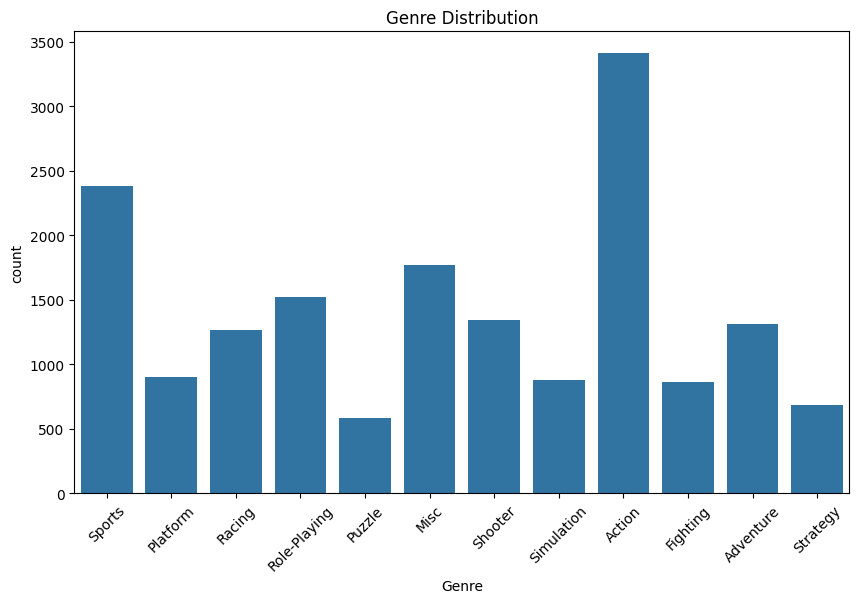

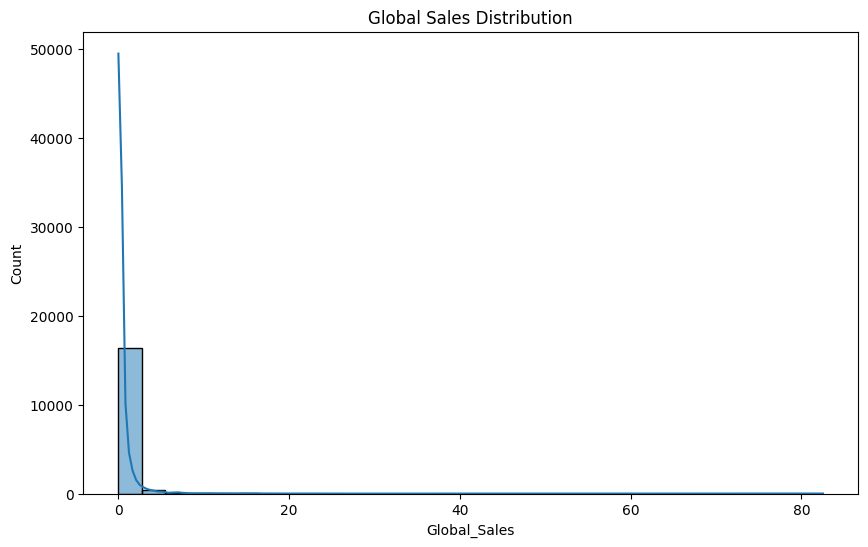

In [ ]:
# Genre Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Genre')
plt.title('Genre')
plt.xticks(rotation=45)
plt.show()

# Sales Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Global Sales')
plt.show()


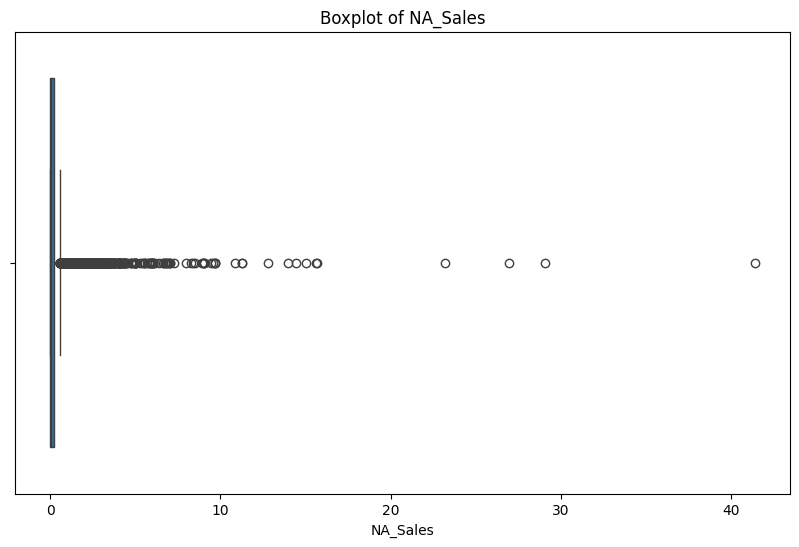

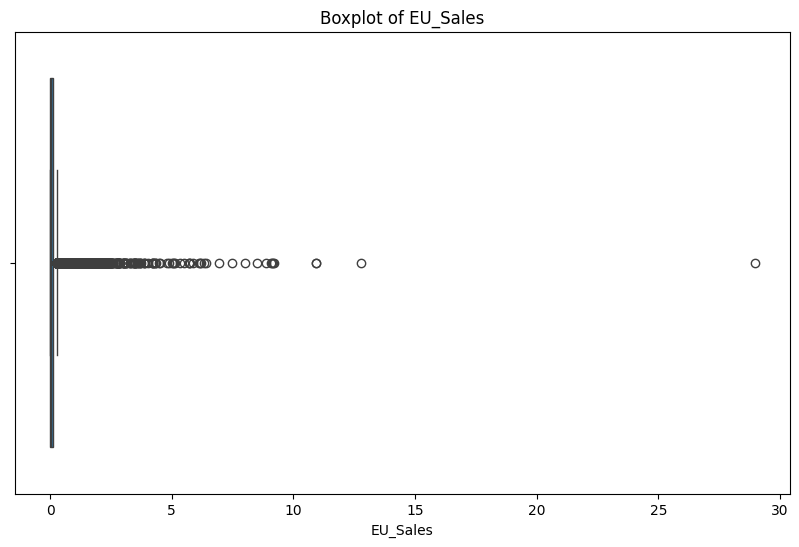

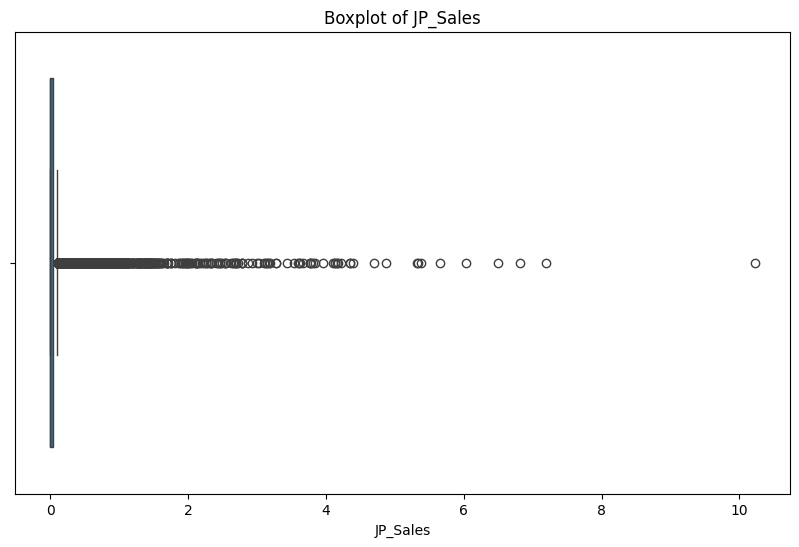

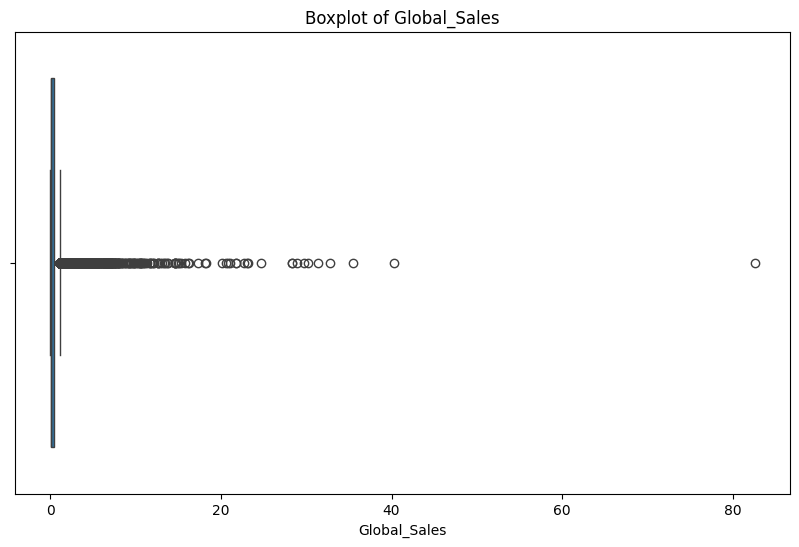

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


Outlier detection was performed using a boxplot for the 'Global_Sales', 'NA_Sales', 'EU_Sales', and 'JP_Sales' columns. The boxplot revealed a significant number of outliers in all these columns. These outliers represent data points that lie outside the typical range, which could potentially affect the analysis and the results.

In [ ]:
# Define a function to cap outliers
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

# Apply the function to sales columns
columns_with_outliers = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
for column in columns_with_outliers:
    df[column] = cap_outliers(df[column])


Handle the outliers by capping them. The function cap_outliers calculates the interquartile range (IQR) for each column, determines the lower and upper bounds for typical data points, and then clips any values outside this range to the nearest bound. This method helps to reduce the impact of extreme outliers on the analysis while preserving the overall distribution of the data.

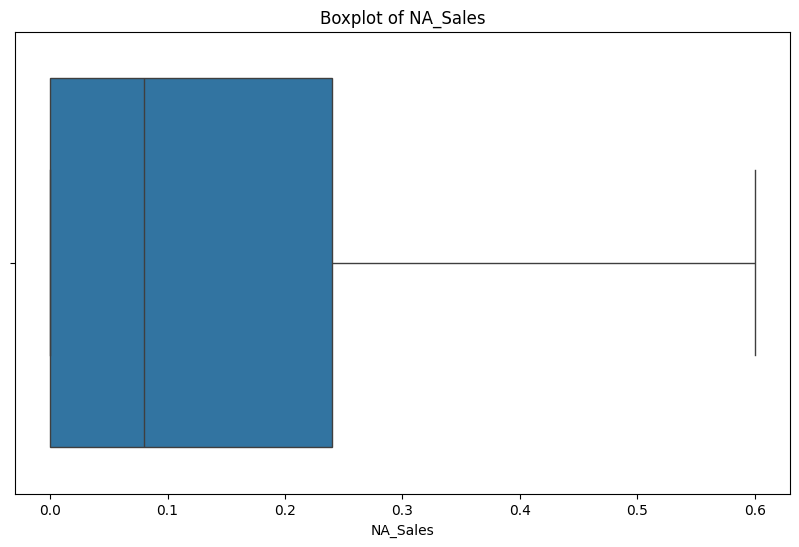

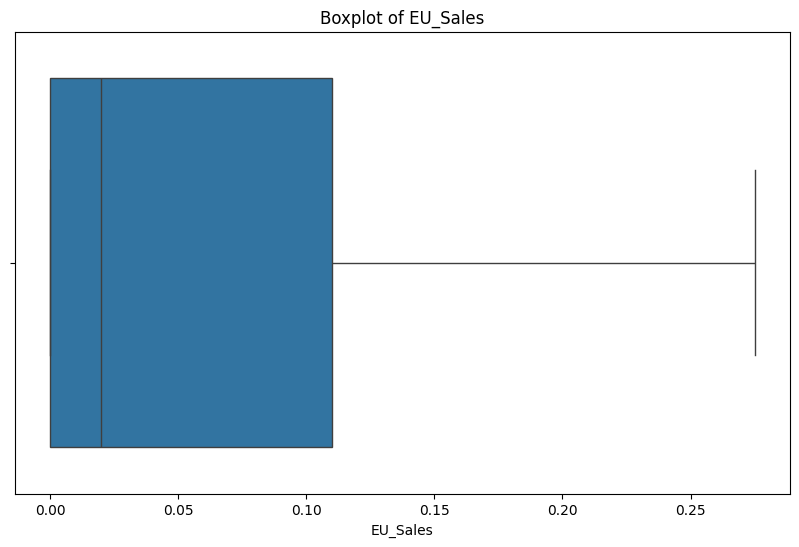

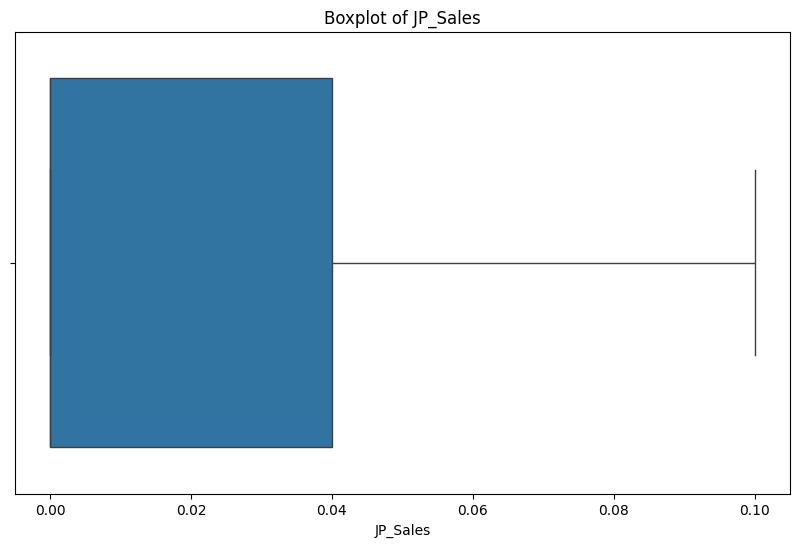

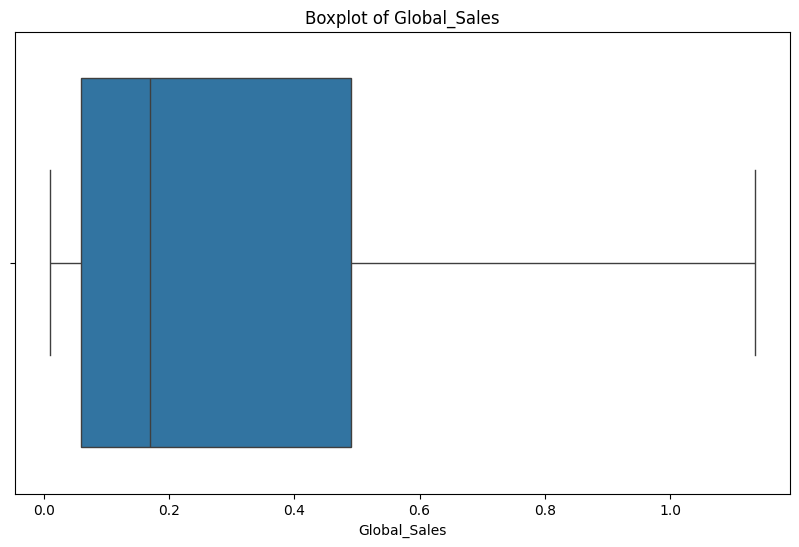

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

for column in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


After applying the capping method to the sales columns, the boxplot visualizations show a more consistent distribution

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def combine_features(row):
    # Convert all columns to strings before concatenation
    return str(row['Name']) + " " + str(row['Platform']) + " " + str(row['Genre']) + " " + str(row['Publisher'])

df['combined_features'] = df.apply(combine_features, axis=1)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

The purpose of this code is to prepare the data for text analysis, specifically to calculate similarities between rows. By combining the 'Name', 'Platform', 'Genre', and 'Publisher' columns into a single string for each row, it creates a unified feature set. The TfidfVectorizer then transforms this text data into numerical vectors, which can be used to compare the importance of terms across the dataset.


In [ ]:
#calculates the cosine similarity between all pairs of rows in the TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
def recommend_games(game_name):
    try:
        idx = df[df['Name'].str.contains(game_name, case=False, na=False)].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:6]  # top 5 recommendation

        game_indices = [i[0] for i in sim_scores]
        recommended_games = df['Name'].iloc[game_indices].values.tolist()
        return recommended_games
    except IndexError:
        return "Game not found. Please try a different name."

game_name_input = input("Enter the name of the game: ")
print(recommend_games(game_name_input))

Enter the name of the game: Mario Kart Wii
['Mario Kart 7', 'Mario Kart 8', 'Mario Kart: Double Dash!!', 'Mario Kart DS', 'Super Mario Kart']


This function is created to recommend similar games based on a given game name. It searches for the game in the dataset, calculates the cosine similarity between the selected game and all other games, and then returns the top 5 most similar games. If the game is not found, the function handles the error and asks the user to try a different name.

In [ ]:
examples = ["Super Mario", "Call of Duty", "Zelda"]
for example in examples:
    print(f"Recommendations for {example}:")
    print(recommend_games(example))
    print("\n")


Recommendations for Super Mario:
22      Super Mario Bros. 3
98      Super Mario Bros. 2
699          FIFA Soccer 09
187     Super Mario Bros. 3
1343       Triple Play 2000
Name: Name, dtype: object


Recommendations for Call of Duty:
36      Call of Duty: Modern Warfare 2
70      Call of Duty 4: Modern Warfare
1965                        Cosmic Ark
37      Call of Duty: Modern Warfare 3
55      Call of Duty: Modern Warfare 2
Name: Name, dtype: object


Recommendations for Zelda:
259        The Legend of Zelda: Ocarina of Time
124                         The Legend of Zelda
400          The Legend of Zelda: Majora's Mask
107      The Legend of Zelda: Twilight Princess
16725                 Crash Bandicoot 3: Warped
Name: Name, dtype: object





For "Super Mario: The recommended games mostly make sense, as they include other "Super Mario" titles. However, there are some unrelated recommendations like "FIFA Soccer 09" which might be due to similarities in platform or publisher.
  
For "Call of Duty: Most of the recommendations are other "Call of Duty" games, which is expected. But there’s one unrelated game ("Cosmic Ark"), likely due to factors beyond just the game genre.

Zelda: Most recommendations are from the "Zelda" series, but "Crash Bandicoot 3: Warped" seems out of place. It might be included because of shared platform or publisher features.

Overall, the recommendations are mostly related to the input games, but some results seem off due to other features influencing the similarity calculation.